# Logistic Regression

Objective: Predicting Breast Cancer either benign or malignant  
Dataset: breast-cancer-wisconsin.data  
Ref: NA

In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
import matplotlib.pyplot as plt 

from sklearn.linear_model import LogisticRegression

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

data = pd.read_csv("breast-cancer-wisconsin.data", header=None)
print('Dataset size', data.shape)
data.head()

Dataset size (699, 11)


,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [2]:
col_name = ['sampleID','clumpThick','cellSize','cellShape','marginal',
            'epithelial','bareNuclei','chromatin','nucleoli','mitoses','class']
data.columns = col_name
data.head()

,sampleID,clumpThick,cellSize,cellShape,marginal,epithelial,bareNuclei,chromatin,nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Data Processing / Exploration

In [3]:
data['class']= data['class'].replace(2,0) #benign
data['class']= data['class'].replace(4,1) #malignant

data.head()

,sampleID,clumpThick,cellSize,cellShape,marginal,epithelial,bareNuclei,chromatin,nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


0    458
1    241
Name: class, dtype: int64


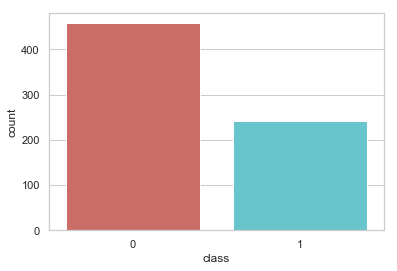

In [4]:
print(data['class'].value_counts())

sns.countplot(x='class',data = data, palette='hls',order = data['class'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

## Correlation

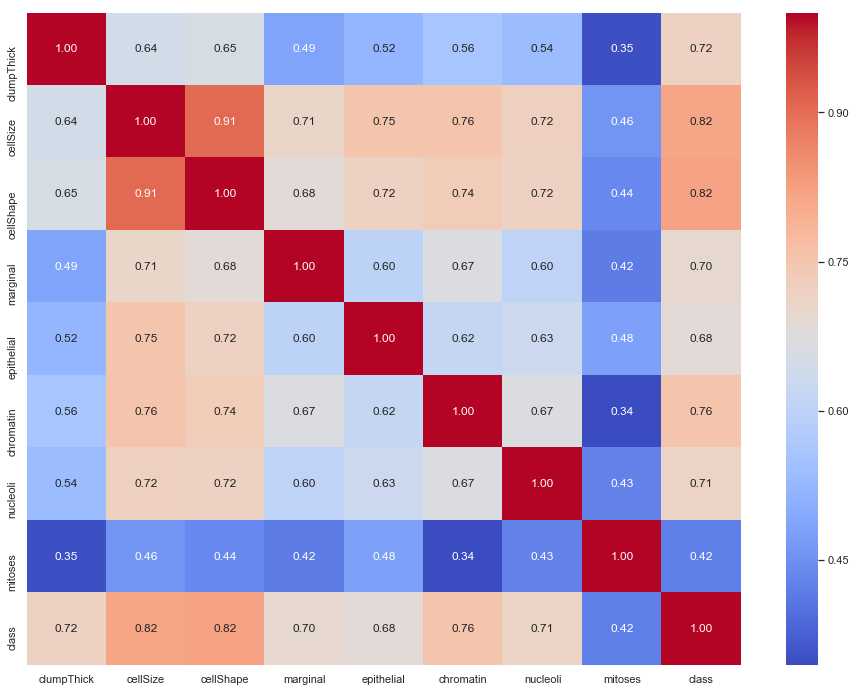

In [5]:
import seaborn as sns
plt.figure(figsize=(16,12))
sns.heatmap(data=data.iloc[:,1:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [6]:
corr_rank = data.iloc[:,1:].corr()
corr_rank["class"].sort_values(ascending=False)

class         1.000000
cellShape     0.818934
cellSize      0.817904
chromatin     0.756616
clumpThick    0.716001
nucleoli      0.712244
marginal      0.696800
epithelial    0.682785
mitoses       0.423170
Name: class, dtype: float64

## Data Processing and Selection

In [7]:
X = np.asarray(data[['clumpThick','cellSize','cellShape','marginal','epithelial','chromatin','nucleoli','mitoses']])
print(X.shape)
X[0:5]

(699, 8)


array([[5, 1, 1, 1, 2, 3, 1, 1],
       [5, 4, 4, 5, 7, 3, 2, 1],
       [3, 1, 1, 1, 2, 3, 1, 1],
       [6, 8, 8, 1, 3, 3, 7, 1],
       [4, 1, 1, 3, 2, 3, 1, 1]], dtype=int64)

In [8]:
y = np.asarray(data['class'])
print(y.shape)
y[0:5]

(699,)


array([0, 0, 0, 0, 0], dtype=int64)

In [9]:
#normalize data
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.20693572, -0.69999505, -0.74329904, -0.63324716, -0.54956136,
        -0.17966213, -0.61182504, -0.34391178],
       [ 0.20693572,  0.28384518,  0.2668747 ,  0.76862067,  1.71010564,
        -0.17966213, -0.28411186, -0.34391178],
       [-0.50386559, -0.69999505, -0.74329904, -0.63324716, -0.54956136,
        -0.17966213, -0.61182504, -0.34391178],
       [ 0.56233637,  1.59563215,  1.61377302, -0.63324716, -0.09762796,
        -0.17966213,  1.35445405, -0.34391178],
       [-0.14846494, -0.69999505, -0.74329904,  0.06768675, -0.54956136,
        -0.17966213, -0.61182504, -0.34391178]])

## Split Train Test

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=4)
print('TRAIN set:', X_train.shape,y_train.shape)
print('TEST set :', X_test.shape, y_test.shape)

TRAIN set: (489, 8) (489,)
TEST set : (210, 8) (210,)


## Modelling

In [12]:
#using liblinear solver
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
logreg = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)

ypred = logreg.predict(X_test)
print(ypred.shape)
ypred

(210,)


array([1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [13]:
y_test

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

## Evaluation

In [14]:
#accuracy evaluation using jaccard index
#if match - accuracy us 1.0 otherwise 0
from sklearn.metrics import jaccard_similarity_score
print('Jaccard Accuracy Score: ', round(jaccard_similarity_score(y_test, ypred)*100,4))
print('Default Accuracy Score: ', round(logreg.score(X_train,y_train)*100,4))

Jaccard Accuracy Score:  94.7619
Default Accuracy Score:  96.1145
